In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [4]:
cv2.imread("basedata/train/no_corr/20.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 92,  97,  96],
        [ 90,  96,  95],
        [ 89,  94,  95]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 82,  87,  86],
        [ 82,  88,  87],
        [ 76,  84,  84]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 63,  68,  69],
        [ 63,  68,  69],
        [ 61,  69,  68]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [11]:
train_dataset = train.flow_from_directory('basedata/train/',
                                          target_size= (300,300),
                                          batch_size= 20,
                                          class_mode= 'binary')

validation_dataset = validation.flow_from_directory('basedata/train/',
                                          target_size= (300,300),
                                          batch_size= 20,
                                          class_mode= 'binary')

Found 622 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [12]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape= (300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
]
)

In [13]:
model.compile(loss= 'binary_crossentropy',
             optimizer= RMSprop(learning_rate=0.001),
              metrics= ['accuracy']
             )

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 64)       

In [15]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch= 5,
                      epochs= 30,
                      validation_data= validation_dataset)

Epoch 1/30
5/5 [==============================] - 10s 2s/step - loss: 2.2209 - accuracy: 0.9390 - val_loss: 26.4349 - val_accuracy: 0.0354
Epoch 2/30
5/5 [==============================] - 9s 2s/step - loss: 5.9474 - accuracy: 0.7700 - val_loss: 0.2385 - val_accuracy: 0.8714
Epoch 3/30
5/5 [==============================] - 9s 2s/step - loss: 0.8129 - accuracy: 0.9000 - val_loss: 0.1050 - val_accuracy: 0.9646
Epoch 4/30
5/5 [==============================] - 10s 2s/step - loss: 0.0627 - accuracy: 0.9800 - val_loss: 0.1245 - val_accuracy: 0.9646
Epoch 5/30
5/5 [==============================] - 10s 2s/step - loss: 0.0740 - accuracy: 0.9800 - val_loss: 0.1031 - val_accuracy: 0.9727
Epoch 6/30
5/5 [==============================] - 10s 2s/step - loss: 0.0602 - accuracy: 0.9900 - val_loss: 0.0798 - val_accuracy: 0.9646
Epoch 7/30
5/5 [==============================] - 11s 2s/step - loss: 0.1123 - accuracy: 0.9600 - val_loss: 0.1738 - val_accuracy: 0.9068
Epoch 8/30
5/5 [===================

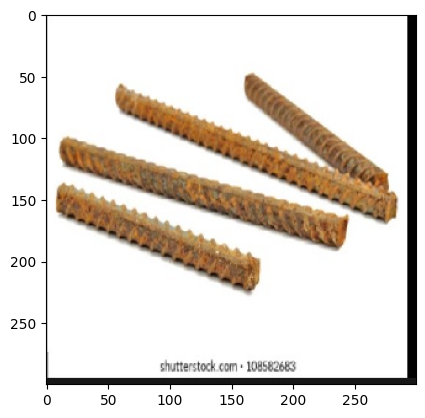

1/1 [==============================] - 0s 37ms/step
Corrosion detected


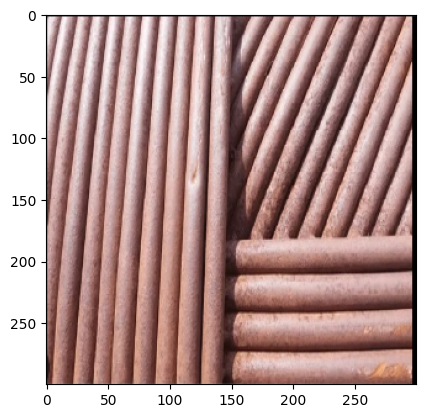

1/1 [==============================] - 0s 38ms/step
Corrosion detected


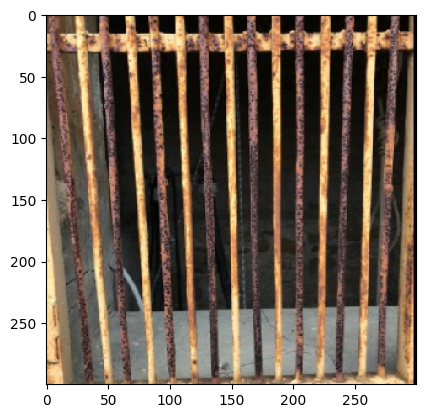

1/1 [==============================] - 0s 38ms/step
Corrosion detected


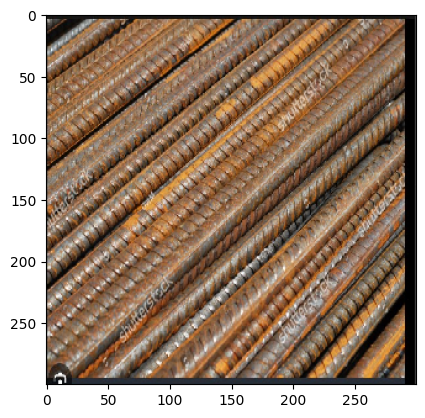

1/1 [==============================] - 0s 48ms/step
Corrosion detected


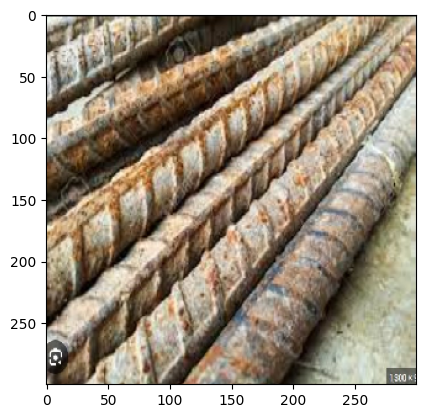

1/1 [==============================] - 0s 40ms/step
Corrosion detected


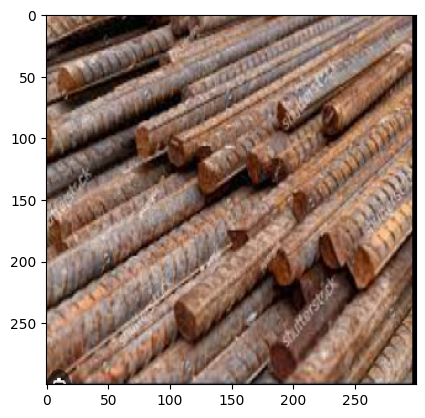

1/1 [==============================] - 0s 43ms/step
Corrosion detected


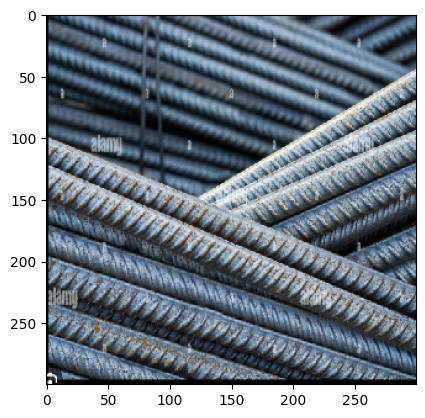

1/1 [==============================] - 0s 41ms/step
Corrosion not detected


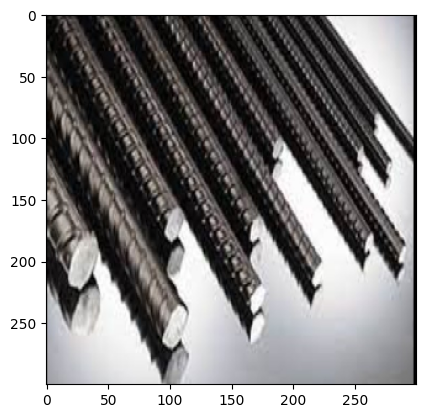

1/1 [==============================] - 0s 37ms/step
Corrosion not detected


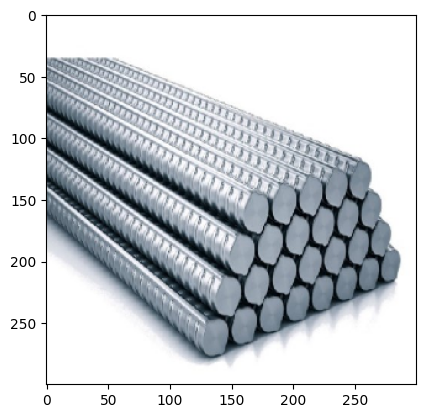

1/1 [==============================] - 0s 40ms/step
Corrosion not detected


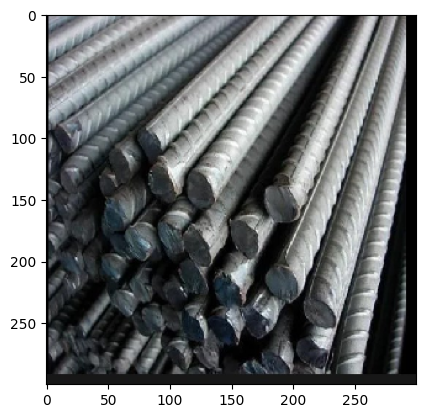

1/1 [==============================] - 0s 33ms/step
Corrosion not detected


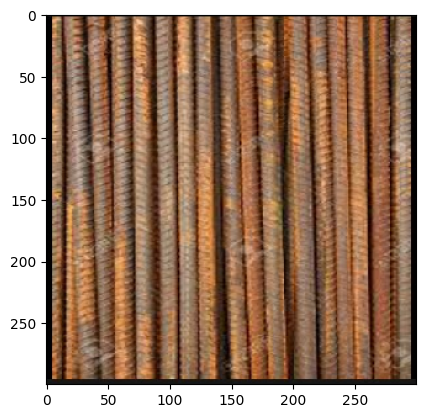

1/1 [==============================] - 0s 37ms/step
Corrosion detected


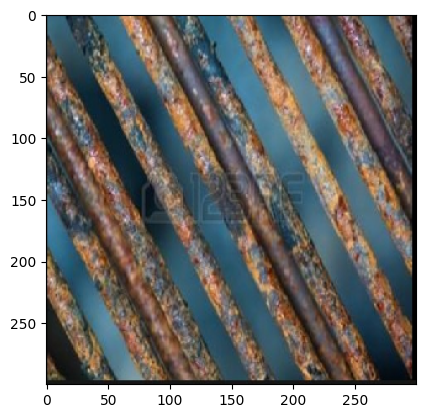

1/1 [==============================] - 0s 41ms/step
Corrosion detected


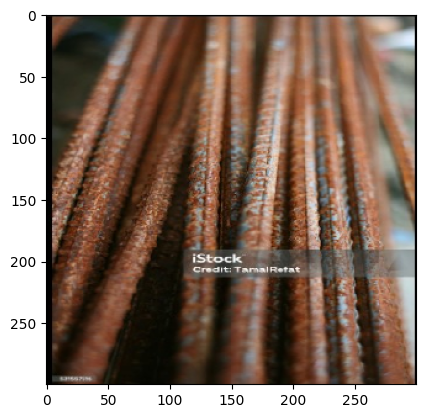

1/1 [==============================] - 0s 38ms/step
Corrosion detected


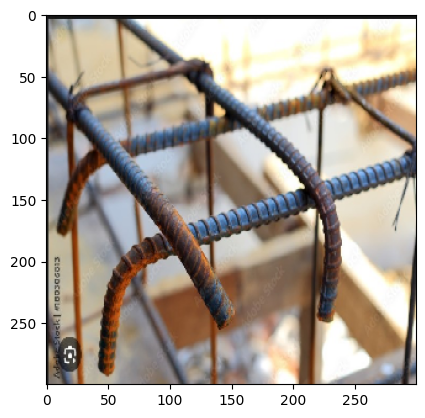

1/1 [==============================] - 0s 37ms/step
Corrosion detected


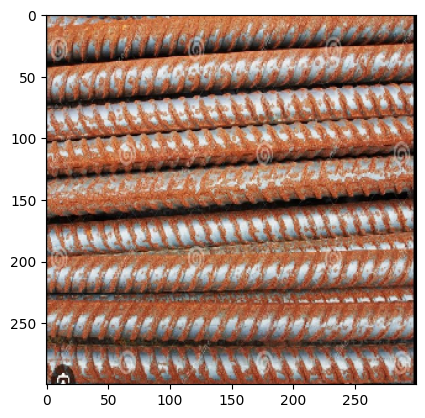

1/1 [==============================] - 0s 40ms/step
Corrosion detected


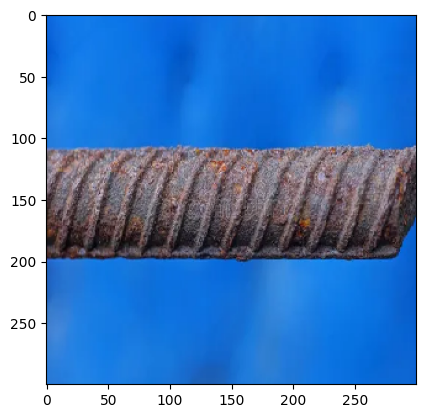

1/1 [==============================] - 0s 33ms/step
Corrosion not detected


In [17]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i,target_size=(300,300))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Corrosion detected")
    else:
        print("Corrosion not detected")